<a href="https://colab.research.google.com/github/JayendranK/Credit-Card-Customer-Segmentation/blob/main/K_Means_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('CC GENERAL.csv')

In [28]:
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,41.900749,0.818182,95.40,1.00,96.40,1.000000,0.166667,1.000000,1.083333,0.000000,1.0,3.0,1001.0,202.802084,140.509787,1.000000,12,1
1,3203.467416,0.909091,0.00,1.00,1.00,6443.945483,0.000000,1.000000,1.000000,0.250000,5.0,1.0,7001.0,4104.032597,1073.340217,1.222222,12,1
2,2496.148862,1.000000,773.17,774.17,1.00,1.000000,1.000000,2.000000,1.000000,0.000000,1.0,13.0,7501.0,623.066742,628.284787,1.000000,12,1
3,1667.670542,0.636364,1499.00,1500.00,1.00,206.788017,0.083333,1.083333,1.000000,0.083333,2.0,2.0,7501.0,1.000000,313.452292,1.000000,12,1
4,818.714335,1.000000,16.00,17.00,1.00,1.000000,0.083333,1.083333,1.000000,0.000000,1.0,2.0,1201.0,679.334763,245.791237,1.000000,12,1
5,1810.828751,1.000000,1333.28,1.00,1334.28,1.000000,0.666667,1.000000,1.583333,0.000000,1.0,9.0,1801.0,1401.057770,2408.246035,1.000000,12,1
6,628.260806,1.000000,7091.01,6403.63,689.38,1.000000,1.000000,2.000000,2.000000,0.000000,1.0,65.0,13501.0,6355.314328,199.065894,2.000000,12,0
7,1824.652743,1.000000,436.20,1.00,437.20,1.000000,1.000000,1.000000,2.000000,0.000000,1.0,13.0,2301.0,680.065082,533.033990,1.000000,12,1
8,1015.926473,1.000000,861.49,662.49,201.00,1.000000,0.333333,1.083333,1.250000,0.000000,1.0,6.0,7001.0,689.278568,312.963409,1.000000,12,1
9,153.225975,0.545455,1281.60,1282.60,1.00,1.000000,0.166667,1.166667,1.000000,0.000000,1.0,4.0,11001.0,1165.770591,101.302262,1.000000,12,1


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   float64
 11  PURCHASES_TRX                     8949 non-null   float64
 12  CREDIT

In [30]:
df.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1565.647593,0.877350,1003.316936,593.503572,412.113579,979.959616,0.490405,1.202480,1.364478,0.135141,4.249078,15.711476,4495.449450,1734.336511,846.003358,1.153732,11.517935,0.920997
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.905284,0.292511,1.337134,0.279525
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,51.000000,1.000000,1.019163,1.000000,6.000000,0.000000
25%,129.365782,0.888889,39.800000,1.000000,1.000000,1.000000,0.083333,1.000000,1.000000,0.000000,1.000000,2.000000,1601.000000,384.282850,171.875613,1.000000,12.000000,1.000000
50%,874.680279,1.000000,361.490000,39.000000,90.000000,1.000000,0.500000,1.083333,1.166667,0.000000,1.000000,8.000000,3001.000000,858.062706,313.452292,1.000000,12.000000,1.000000
75%,2055.372848,1.000000,1110.170000,578.830000,469.650000,1114.868654,0.916667,1.300000,1.750000,0.222222,5.000000,18.000000,6501.000000,1902.279320,789.721609,1.142857,12.000000,1.000000
max,19044.138560,1.000000,49039.570000,40762.250000,22501.000000,47138.211760,1.000000,2.000000,2.000000,1.500000,124.000000,359.000000,30001.000000,50722.483360,76407.207520,2.000000,12.000000,2.000000


In [33]:
df.isna().sum()


BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
cluster_id                          0.0
dtype: float64

In [8]:
df.drop(['CUST_ID'], axis=1, inplace=True)


In [9]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)


In [10]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)


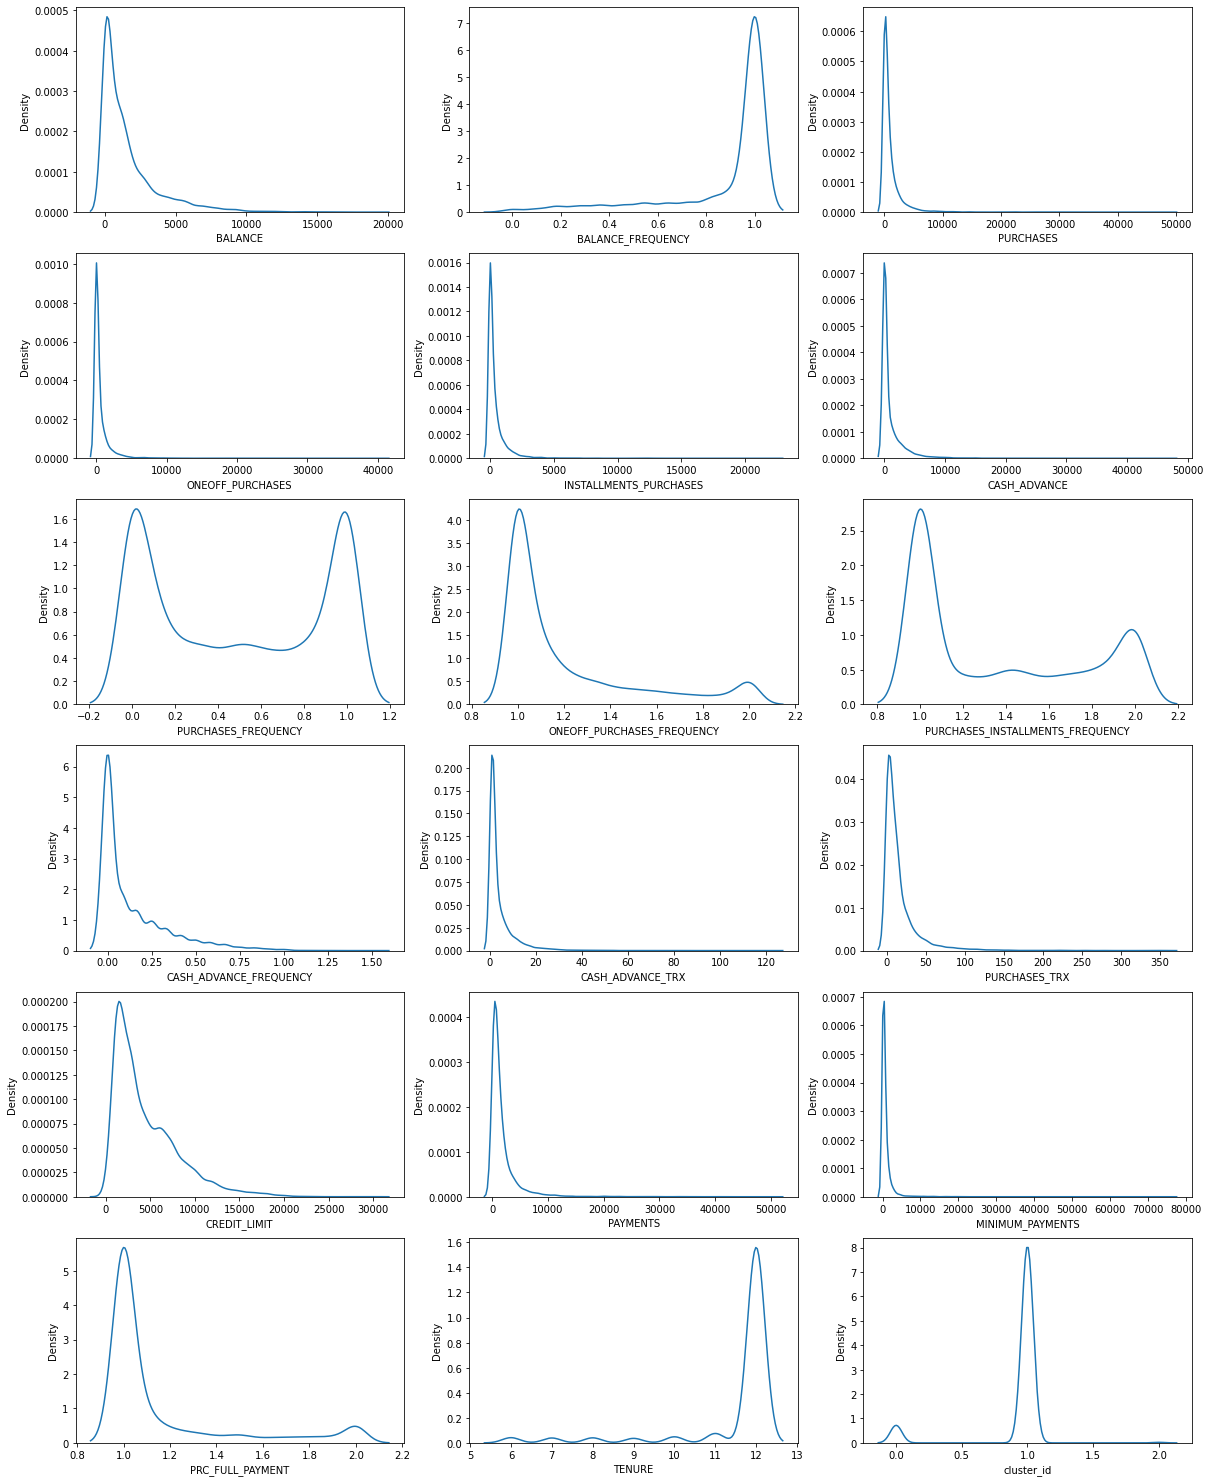

In [36]:
plt.figure(figsize=(20,40))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 3, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [12]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']



In [38]:
for col in cols:
    df[col] = np.log(1 + df[col])

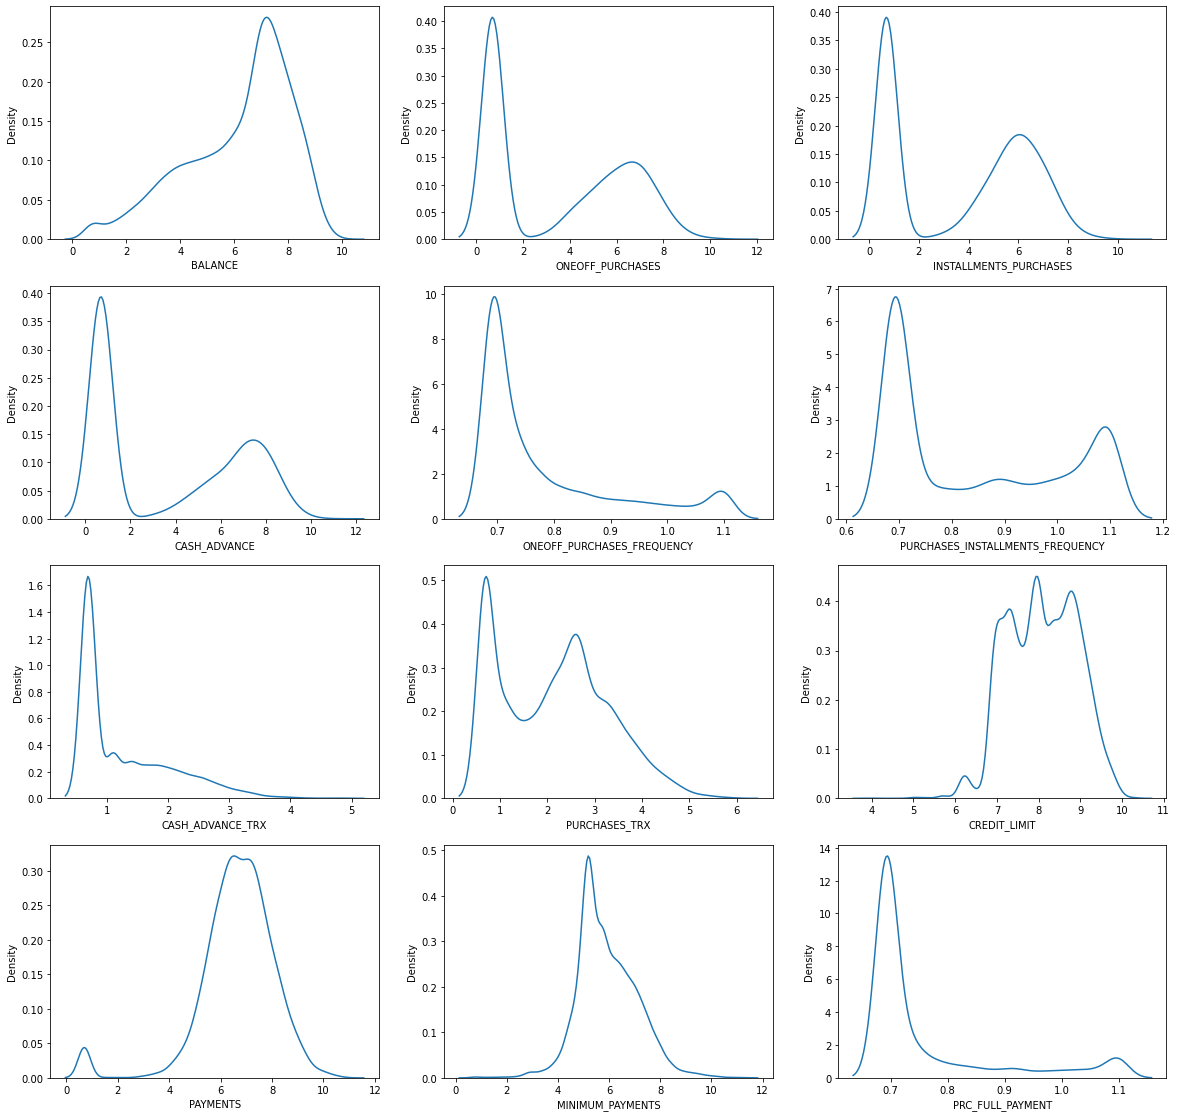

In [39]:
plt.figure(figsize=(20,30))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 3, i+1)
    sns.kdeplot(df[col], ax=ax)
plt.show()


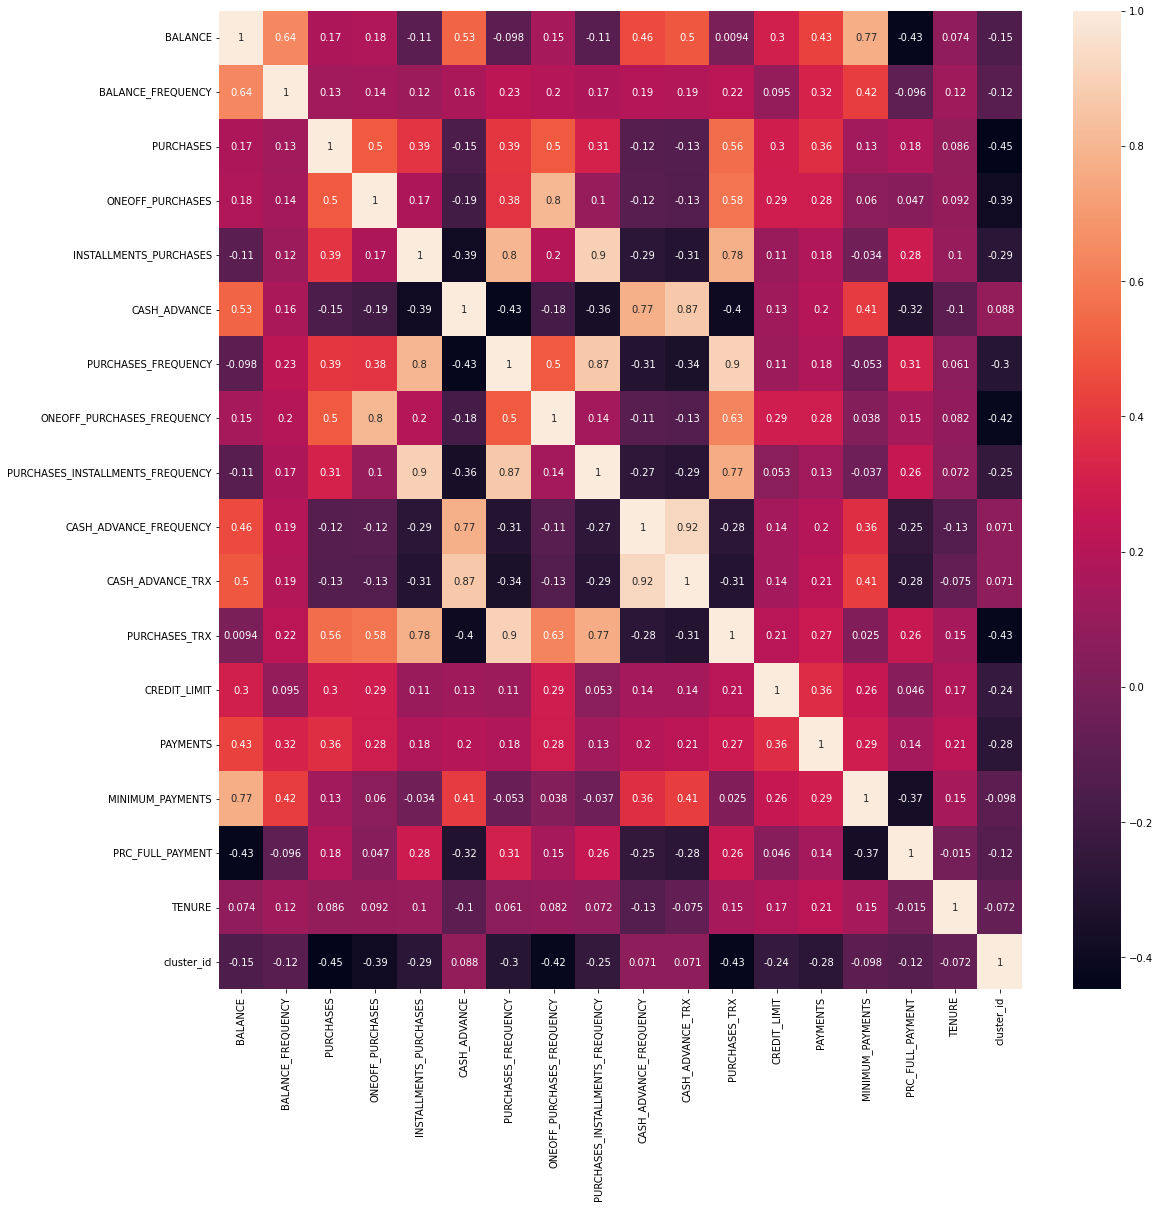

In [41]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
X_red = pca.fit_transform(df)

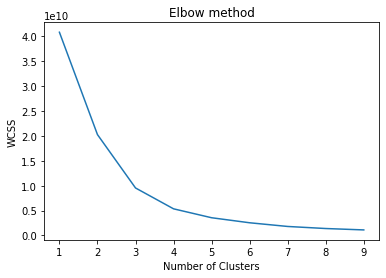

In [45]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=2).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

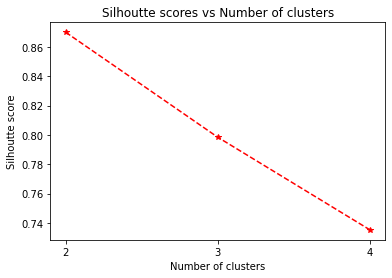

In [47]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(X_red, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "r*--")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [50]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=2)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of our model is 0.8700456686749861


In [51]:
df['cluster_id'] = kmeans.labels_

In [52]:
for col in cols:
    df[col] = np.exp(df[col])

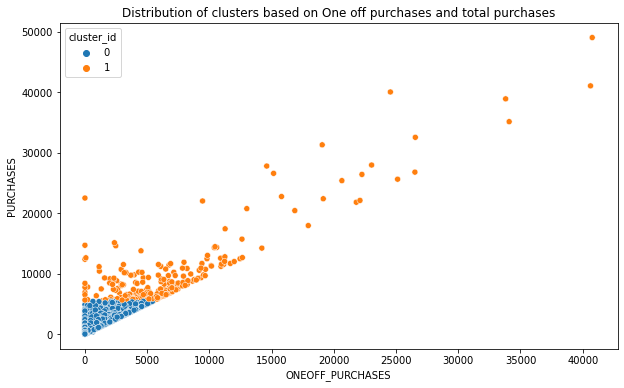

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

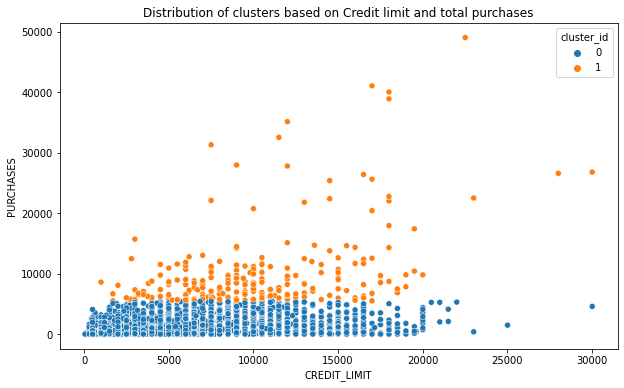

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

In [55]:
kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(X_red)

KMeans(n_clusters=3, random_state=23)

In [56]:
df['cluster_id'] = kmeans.labels_


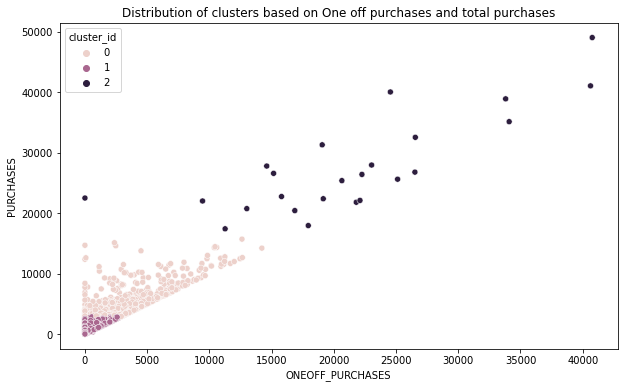

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()


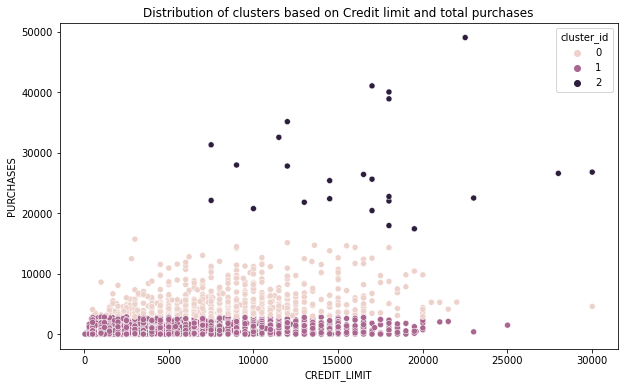

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()